In [42]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
#import scipy.stats.linregress as lrgs
%matplotlib inline 

intervals = np.arange(0,20,2)       # Same as 0:2:18;
#print(intervals)   
    
sample1 = [36.22,37.56,38.64,43.48,45.9,56.9,66.64,77,94.4,100.79];
sample2 = [36.2, 40.17, 44.61, 54.59, 68.14, 89.52, 117.1,207.83, np.nan, np.nan];   # NVM: not including cuz its an outlier
sample3 = [36.45,39.35,46.4,56.45,75.07, 104.31, 175.52, 298.76, np.nan, np.nan];    # NVM: not including cuz its an outlier
sample4 = [37.29, 39.32, 42.89, 48.02, 52.78, 63.8, 74.9, 87.06, 104.37, np.nan];
sample5 = [37.26, 37.8, 39.05, 43.34, 48.6, 56.79, 64.32, 75.16, 83.98, 93.37];
sample6 = [36.05, 39.7,45.15, 48.39, 55.81, 64.81, 76.8, 104.39, 154.36, np.nan];
sample7 = [37.88, 38.36, 41.15, 45.73, 52.52, 60.3, 68.78, 85, 97.5, np.nan];
sample8 = [37.44, 38.01, 40.48, 43.52, 50.32, 57.8, 66.76, 80.8, 90.77, 108.16];
sample9 = [35.77, 38, 40, 43.31, 46.89, 52.9, 62.1, 73.35, 91.78, np.nan];
sample10 = [35.18, 38.59, 41.07, 46.12,52.22, 60.08, 69.09, 81.98, 99.97, np.nan];

samples = np.array([sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8, sample9, sample10])
#print(samples)
samples_mixed = np.append([sample1], [ sample2, sample3, sample4, sample5, sample6, sample7, sample8, sample9, sample10])
#print(samples_mixed)
#print(len(samples_mixed))

df_intervals = pd.DataFrame(data = intervals.transpose())
#print(df_intervals)
intervals_repeating_samples = np.append([intervals], [intervals,intervals,intervals,intervals,intervals,intervals,intervals,intervals,intervals])

# print(len(samples_mixed), len(intervals_repeating_samples))

samples_intervals = np.append([samples_mixed], [intervals_repeating_samples], axis =0)
# print(samples_intervals)



df = pd.DataFrame(data = samples_intervals.transpose())
df.dropna(inplace=True)      # get rid of nans so linear reg works
x_column = 'Run-times'
y_column = 'Distance (mm)'
df.columns = [x_column, y_column]
df_samples = pd.DataFrame(data = samples)
# df = pd.DataFrame([sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8, sample9, sample10])
#print(df_samples)
#df = pd.concat([df_samples, df_intervals], axis=1)
# print(df)

independent_variable = df[x_column]
dependent_variable = df[y_column]

# print(independent_variable)
# print(dependent_variabble)



df_mean = df.transpose().mean()
# print(df_mean)
#df_transpose = df.transpose()
#df_mean
#df_transpose.plot(kind='area')
#df.plot()
#df.plot(kind='scatter', df, intervals)



TypeError: 'AxesSubplot' object is not subscriptable

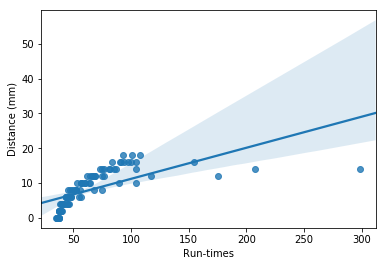

In [2]:
#### Linear regression fit
lm = sns.regplot(x=x_column, y=y_column, data=df)
lm.axes[0,0].set_xlim(0,)
# xlim = [30,400]


           3            2
7.716e-06 x - 0.004231 x + 0.6848 x - 18.12


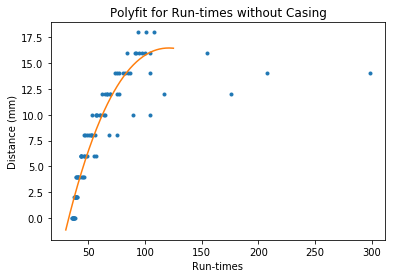

In [3]:
#### Polynomial fitting
fit = np.polyfit(independent_variable, dependent_variable, 3)
function = np.poly1d(fit)
print(function)

x_spacing = np.linspace(30, 125, 200)
y_spacing = function(x_spacing)

plt.plot(independent_variable, dependent_variable, '.', x_spacing, y_spacing, '-')
plt.title('Polyfit for Run-times without Casing')
ax = plt.gca()
fig = plt.gcf()
plt.xlabel(x_column)
plt.ylabel(y_column)

plt.show()
plt.close()

Text(0.5, 1.0, 'Mean of run-times without Casing')

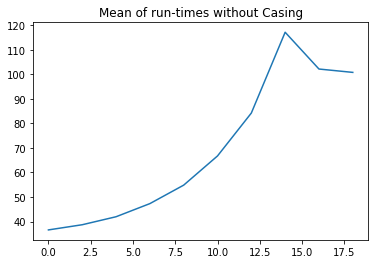

In [4]:
#### Mean of all run times
plt.plot(intervals, df_samples.mean())
#plt.plot(intervals, df_samples.mean())
plt.title("Mean of run-times without Casing")

In [5]:
#### Samples with casing

intervals = np.arange(0,18,2)       # Same as 0:2:20;

casing1 = [35.18, 36.43, 41.58, 45.76, 52.58, 60.98, 70.38, 82.20, 91.95];
casing2 = [36.49, 37.59, 40.49, 44.75, 50.10, 57.51, 65.48, 73.17, 81.65];
casing3 = [35.65, 37.05, 40.61, 46.47, 55.46, 64.69, 81.56, 94.22, 110.77];
casing4 = [36.56, 37.91, 40.81, 47.20, 53.98, 61.70, 72.62, 91.90, 107.30];
casing5 = [36.74, 37.91, 39.72, 43.48, 48.17, 54.58, 61.67, 61.90, 80.33];
casing6 = [35.61, 36.83, 39.69, 44.52, 50.96, 60.15, 68.50, 78.00, 86.29];
casing7 = [36.01, 37.17, 39.88, 43.31, 49.87, 56.53, 66.30, 77.40, 84.43];
casing8 = [37.07, 38.76, 39.45, 43.89, 50.25, 55.72, 64.86, 75.00, 80.08];
casing9 = [38.35, 40.70, 45.08, 45.08, 50.03, 56.86, 65.64, 79.19, 89.56];
casing10 = [35.8, 37.34, 41.60, 46.20, 54.69, 64.67, 76.40, 92.30, 109.33];

casings = np.array([casing1, casing2, casing3, casing4, casing5, casing6, casing7, casing8, casing9, casing10])
casings_mixed = np.append([casing1], [casing2, casing3, casing4, casing5, casing6, casing7, casing8, casing9, casing10])

casings_titles = ['casing1', 'casing2', 'casing3', 'casing4', 'casing5', '10mm', 'casing7', 'casing8', 'casing9']

intervals_repeating_casings = np.append([intervals], [intervals, intervals,intervals,intervals,intervals,intervals,intervals,intervals,intervals])
df_intervals = pd.DataFrame(data = intervals)

casings_intervals = np.append([casings_mixed], [intervals_repeating_casings], axis =0)
# print(samples_intervals)



df = pd.DataFrame(data = casings_intervals.transpose())
df.dropna(inplace=True)      # get rid of nans so linear reg works
x_column = 'Run-times with Casing'
y_column = 'Distance (mm)'
df.columns = [x_column, y_column]

df_casings = pd.DataFrame(data = casings)
# df = pd.DataFrame([sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8, sample9, sample10])
# df_casings.rename(columns={1: 2, 2: 4,3:6,4:8,5:10,6:12,7:14,8:16})
# df_casings.rename(lambda x: x * 2)
# print(df_casings)
# df_casings_intervals= pd.concat([df_casings, df_intervals], axis=1)
# print(df_casings_intervals)

independent_variable = df[x_column]
dependent_variable = df[y_column]

# print(independent_variable)
# print(dependent_variabble)


df_mean = df.transpose().mean()
# print(df_mean)
#df_transpose = df.transpose()
#df_mean
#df_transpose.plot(kind='area')
#df.plot()
#df.plot(kind='scatter', df, intervals)
# print(df_casings)

           3           2
4.813e-05 x - 0.01407 x + 1.426 x - 34.57


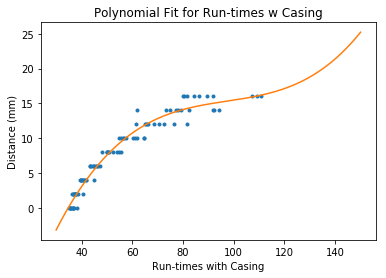

In [47]:
#### Polynomial fitting
fit = np.polyfit(independent_variable, dependent_variable, 3)
function = np.poly1d(fit)
print(function)

x_spacing = np.linspace(30, 150, 200)
y_spacing = function(x_spacing)

plt.plot(independent_variable, dependent_variable, '.', x_spacing, y_spacing, '-')
plt.title('Polynomial Fit for Run-times w Casing')
# ax = plt.gca()
# fig = plt.gcf()
plt.xlabel(x_column)
plt.ylabel(y_column)

plt.show()
plt.close()

Text(0, 0.5, 'Run-times with Casing')

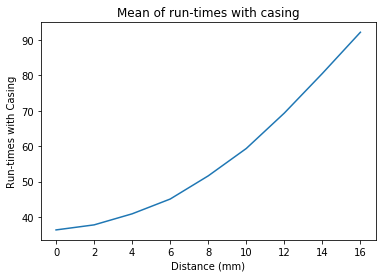

In [7]:
#### Mean of all run times
plt.plot(intervals, df_casings.mean())
#plt.plot(intervals, df_samples.mean())
plt.title("Mean of run-times with casing")
plt.xlabel(y_column)
plt.ylabel(x_column)

TypeError: 'AxesSubplot' object is not subscriptable

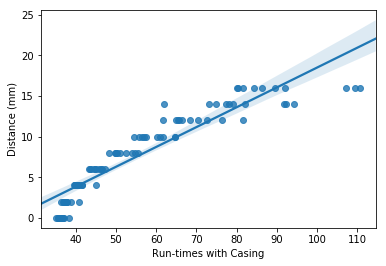

In [8]:
#### Linear regression fit
lm = sns.regplot(x=x_column, y=y_column, data=df)
lm.axes[0,0].set_xlim(0,)


In [9]:
#### Boxplot with casing

df_testline_casings_old = df_casings.loc('10mm')
df_testline_casings_old.rename("10mm")
print(df_testline_casings_old)
df_testline_casings_old.plot(kind='box', title = "Flow Time Consistency at 10mm",)

ValueError: No axis named 10mm for object type <class 'type'>

In [9]:
#### Normalized data

## Normalizing no case samples
samples_normalized = samples
for i in range(samples.shape[0]):
    samples_normalized[i] = samples[i] - samples[i,0]
# print(samples)

intervals_repeating_samples
samples_normalized_1d = samples_normalized.ravel()
# print(samples_normalized_1d)
samples_intervals_normalized = np.append([samples_normalized_1d], [intervals_repeating_samples], axis =0)
# print(casings_intervals)

df_samples_normalized = pd.DataFrame(data = samples_normalized)


## Normalizing samples with case
casings_normalized = casings
for i in range(casings.shape[0]):
    casings_normalized[i] = casings[i] - casings[i,0]
# print(casings)


casings_normalized_1d = casings_normalized.ravel()
# print(casings_normalized_1d.shape, intervals_repeating_casings.shape)
casings_intervals_normalized = np.append([casings_normalized_1d], [intervals_repeating_casings], axis =0)
# print(casings_intervals)

df_casings_normalized = pd.DataFrame(data = casings_normalized)


           3            2
7.688e-06 x - 0.003374 x + 0.4054 x + 1.669


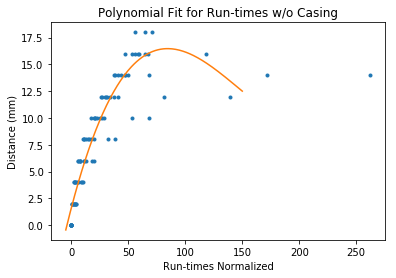

In [10]:
#### Polynomial fitting normalized data: no case

df = pd.DataFrame(data = samples_intervals_normalized.transpose())
df.dropna(inplace=True)      # get rid of nans so linear reg works
x_column = 'Run-times Normalized'
y_column = 'Distance (mm)'
df.columns = [x_column, y_column]

independent_variable = df[x_column]
dependent_variable = df[y_column]





fit = np.polyfit(independent_variable, dependent_variable, 3)
function = np.poly1d(fit)
print(function)

x_spacing = np.linspace(-5, 150, 200)
y_spacing = function(x_spacing)

plt.plot(independent_variable, dependent_variable, '.', x_spacing, y_spacing, '-')
plt.title('Polynomial Fit for Run-times w/o Casing')
# ax = plt.gca()
# fig = plt.gcf()
plt.xlabel(x_column)
plt.ylabel(y_column)

plt.show()
plt.close()

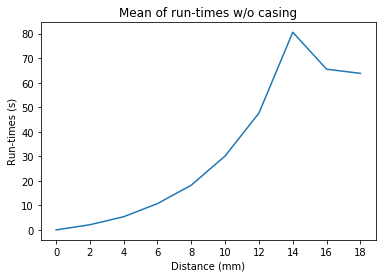

In [75]:
#### Mean of all run times: normalized, no casing
intervals = np.arange(0,20,2)
# print(intervals) 

plt.plot(intervals, df_samples_normalized.mean())
plt.title("Mean of run-times w/o casing")
x_column = "Run-times (s)"
plt.xlabel(y_column)
plt.ylabel(x_column)
ax = plt.gca()
ax.set_xticks(intervals)

           3            2
5.408e-05 x - 0.009493 x + 0.6122 x + 0.9397


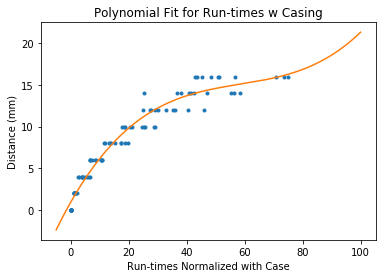

In [12]:
#### Polynomial fitting normalized data: with case

df = pd.DataFrame(data = casings_intervals_normalized.transpose())
df.dropna(inplace=True)      # get rid of nans so linear reg works
x_column = 'Run-times Normalized with Case'
y_column = 'Distance (mm)'
df.columns = [x_column, y_column]

independent_variable = df[x_column]
dependent_variable = df[y_column]





fit = np.polyfit(independent_variable, dependent_variable, 3)
function = np.poly1d(fit)
print(function)

x_spacing = np.linspace(-5, 100, 200)
y_spacing = function(x_spacing)

plt.plot(independent_variable, dependent_variable, '.', x_spacing, y_spacing, '-')
plt.title('Polynomial Fit for Run-times w Casing')
# ax = plt.gca()
# fig = plt.gcf()

plt.xlabel(x_column)
plt.ylabel(y_column)

plt.show()
plt.close()

(0, 80)

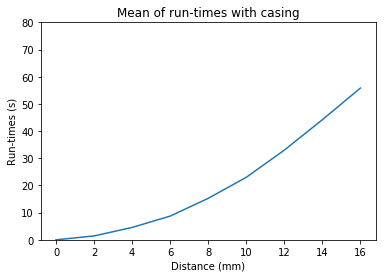

In [74]:
#### Mean of all run times: normalized, with casing
intervals = np.arange(0,18,2)       # Same as 0:2:18;

plt.plot(intervals, df_casings_normalized.mean())
#plt.plot(intervals, df_samples.mean())
plt.title("Mean of run-times with casing")
x_column = "Run-times (s)"
plt.xlabel(y_column)
plt.ylabel(x_column)
plt.ylim(0,80)

count    10.000000
mean     22.993000
std       4.236196
min      17.840000
25%      19.117500
50%      22.780000
75%      25.635000
max      29.040000
Name: 10mm, dtype: float64


Text(0, 0.5, 'Flow time (s)')

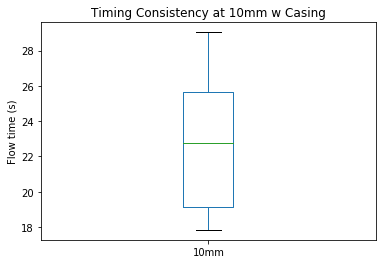

In [72]:
#### Boxplot with casing

df_testline_casings = pd.Series(df_casings_normalized[5], name = "10mm")
print(df_testline_casings.describe())
df_testline_casings.columns = ['10mm']
# print(df_testline)
df_testline_casings.plot(kind='box', y='10mm', title = "Timing Consistency at 10mm w Casing")
# ax1.set_xlabel("10mm")
plt.ylabel("Flow time (s)")

10mm
Timing Consistency at Testline


Text(0.5, 0, 'With Casing')

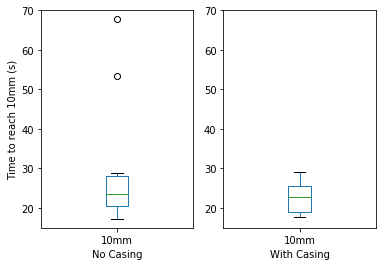

In [73]:
#### Boxplot for both casing / without

df_testline_samples = pd.Series(df_samples_normalized[5], name = "10mm")
print(df_testline_samples.name)

# df_testline = pd.merge(df_testline_samples, df_testline_casings)
# df_testline.columns = ['10mm','10mm']
# df_testline.plot(kind='box', ylim=[15,70])

fig, (ax1, ax2) = plt.subplots(ncols=2)
df_testline_samples.plot(kind='box',ax=ax1, ylim=[15,70])
df_testline_casings.plot(kind='box',ax=ax2,ylim=[15,70])
print("Timing Consistency at Testline")
ax1.set_ylabel("Time to reach 10mm (s)")
ax1.set_xlabel("No Casing")
ax2.set_xlabel("With Casing")



Text(0, 0.5, 'Run-times (s)')

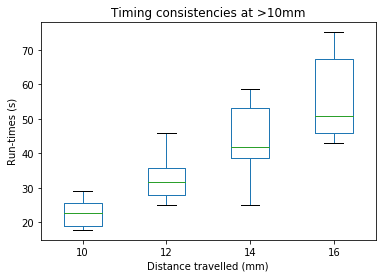

In [32]:
#### Reasoning behind the choice of 10mm as the test line: showing sample consistencies at 10mm and higher

df_casings_upper = df_casings_normalized[[5, 6, 7, 8]]
df_casings_upper.columns = ['10','12','14','16']
df_casings_upper.plot(kind='box')
plt.title("Timing consistencies at >10mm")
plt.xlabel("Distance travelled (mm)")
plt.ylabel("Run-times (s)")